In [282]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Data

In [283]:
# Paths to the data files
abundance_file_path = './data/species_abundance_filt.csv'
organism_subset_file_path = './data/organism_data_to_subset.csv'

# Load both files
# species_abundance_filt.csv: This file contains abundance data for different species, 
# used to filter and visualize abundance patterns based on environmental variables such as soil pH.
# The column "taxon" in this file corresponds to "Species of interest" in organism_data_to_subset.csv,
# allowing the two datasets to be merged for visualization.
df_abundance = pd.read_csv(abundance_file_path)

# organism_data_to_subset.csv: This file contains information on environmental preferences for various species,
# such as soil pH preference. The column "Species of interest" in this file aligns with "taxon" in
# species_abundance_filt.csv, enabling filtering and visualization based on specific environmental preferences.
df_to_subset = pd.read_csv(organism_subset_file_path)



# Check Data Sizes

In [284]:
print(df_abundance.shape)
print(df_to_subset.shape)
unique_species_count = df_to_subset['Species of interest'].nunique()
print(unique_species_count)

(66210, 24)
(6125, 31)
4998


Duplicates in subset of organisms, need to remove

In [285]:
# Check for duplicates in the 'Species of interest' column
duplicates = df_to_subset[df_to_subset.duplicated(subset='Species of interest', keep=False)]
duplicate_species_names = duplicates['Species of interest'].unique()

# Print the names of duplicate species
print(duplicate_species_names)

['Bacillus paramycoides' 'Bacillus sp. MM2020_4' 'Methanosarcina sp. Ant1'
 'Clostridium sp. AM58-1XD' 'Clostridium sp. MCC353'
 'Bacillus sp. USDA818B3_A' 'Bacillus sp. CMF21' 'Bacillus sp. S3'
 'Bacillus sp. FJAT-49736' 'Rhodotorula toruloides'
 'Methanosarcina sp. 2.H.T.1A.6' 'Bacillus sp. FJAT-27264'
 'Clostridium pasteurianum' 'Clostridium sp. USBA 49'
 'Clostridium tarantellae' 'Bacillus sp. AFS096315'
 'Bacillus sp. FJAT-42376' 'Clostridium fallax' 'Bacillus ectoiniformans'
 'Clostridium sp. Marseille-P2415' 'Bacillus solitudinis'
 'Clostridium lacusfryxellense' 'Nitrosomonas sp. Nm34'
 'Bacillus amyloliquefaciens' 'Bacillus sp. FJAT-26390'
 'Bacillus tianshenii' 'Bacillus sp. NTK074B' 'Bacillus safensis'
 'Bacillus sp. Soil768D1' 'Clostridium botulinum' 'Nitrosomonas mobilis'
 'Bacillus sp. REN3' 'Clostridium sp. C2-6-12' 'Bacillus sp. FJAT-27225'
 'Bacillus sp. B15-48' 'Bacillus subtilis' 'Bacillus bingmayongensis'
 'Bacillus sp. HMF5848' 'Clostridium sp. AF27-2AA'
 'Clostridi

# Remove Duplicates

In [286]:
# Remove Duplicate Species
df_to_subset = df_to_subset.drop_duplicates(subset='Species of interest')
df_to_subset.shape

(4998, 31)

# Merge Data

In [287]:
merged_data = pd.merge(
    df_to_subset, df_abundance, 
    left_on='Species of interest', right_on='name', 
    how='inner'
)


merged_data.shape


(66210, 55)

In [288]:
print(merged_data.columns)
top_species = merged_data.groupby('Species of interest').size().nlargest(10).reset_index(name='count')
top_species

Index(['Unnamed: 0', 'GEM ID', 'Kingdom', 'Genus', 'Species.strain',
       'Citation', 'Source', 'Filepath', 'Match criteria',
       'Species of interest', 'Functional in COMETS?', 'taxonomy_id_x',
       'lineage_x', 'db_name_x', 'cultivatedCrops', 'deciduousForest',
       'dwarfScrub', 'emergentHerbaceousWetlands', 'evergreenForest',
       'grasslandHerbaceous', 'mixedForest', 'pastureHay', 'sedgeHerbaceous',
       'shrubScrub', 'woodyWetlands', 'source_x', 'pH_preference',
       'temperature_preference', 'genome_link', 'GEM_ID', 'match_by', 'name',
       'taxonomy_id_y', 'percentage', 'lineage_y', 'source_y', 'is_MAG',
       'taxid_lineage', 'genomicsSampleID', 'd15N', 'organicd13C',
       'nitrogenPercent', 'organicCPercent', 'soilTemp', 'soilMoisture',
       'soilInWaterpH', 'soilInCaClpH', 'latitude', 'longitude', 'elevation',
       'sampleTiming', 'nlcdClass', 'db_name_y', 'taxon', 'n_samples'],
      dtype='object')


,Species of interest,count
0,Deltaproteobacteria bacterium,1357
1,Verrucomicrobiaceae bacterium,1355
2,Hyphomicrobiaceae bacterium,1345
3,Methylobacterium oryzihabitans,1326
4,Nonomuraea sp. NEAU-A123,1321
5,Mycobacterium sp. 1245111.1,1310
6,uncultured Telmatospirillum sp.,1308
7,Bordetella genomosp. 9,1303
8,Chloroflexi bacterium OHK40,1302
9,Ramlibacter ginsenosidimutans,1300


In [289]:
species_name = ["Deltaproteobacteria bacterium", "Verrucomicrobiaceae bacterium", "Hyphomicrobiaceae bacterium", "Methylobacterium oryzihabitans", "Nonomuraea sp. NEAU-A123", "Mycobacterium sp. 1245111.1", "uncultured Telmatospirillum sp.", "Bordetella genomosp. 9"]

# Filter for the target species
target_species = merged_data[merged_data['Species of interest'].isin(species_name)]



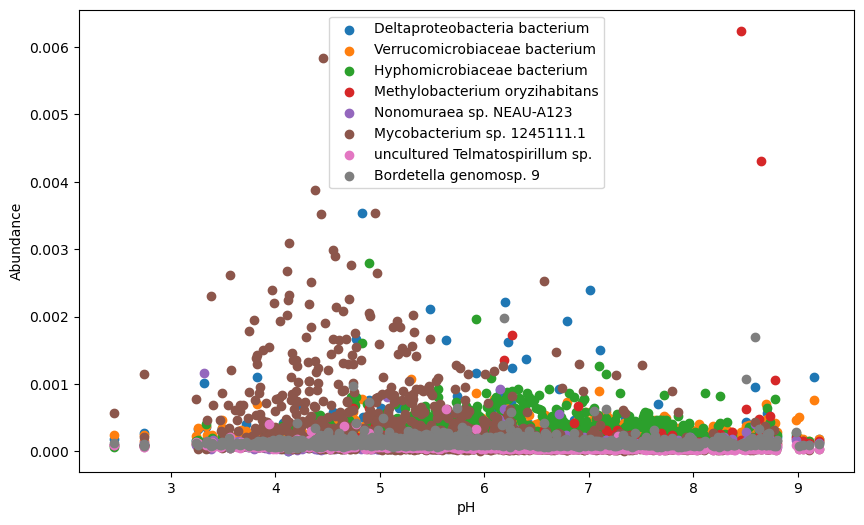

<Figure size 640x480 with 0 Axes>

In [290]:
# Plot the abundance of the top species
plt.figure(figsize=(10, 6))
for species in species_name:
    species_data = target_species[target_species['Species of interest'] == species]
    plt.scatter(species_data['soilInWaterpH'], species_data['percentage'], label=species)

plt.xlabel('pH')
plt.ylabel('Abundance')
plt.legend()
plt.show()
plt.savefig('abundance_vs_ph.png')

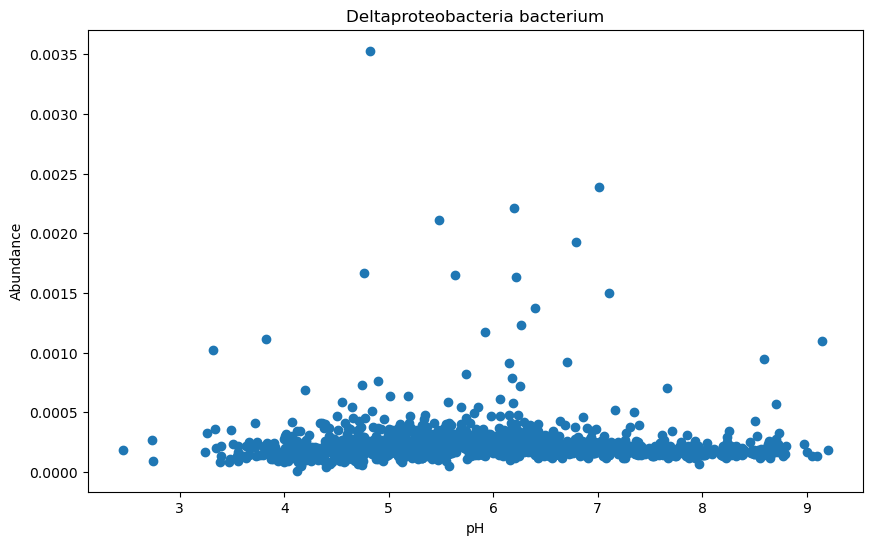

<Figure size 640x480 with 0 Axes>

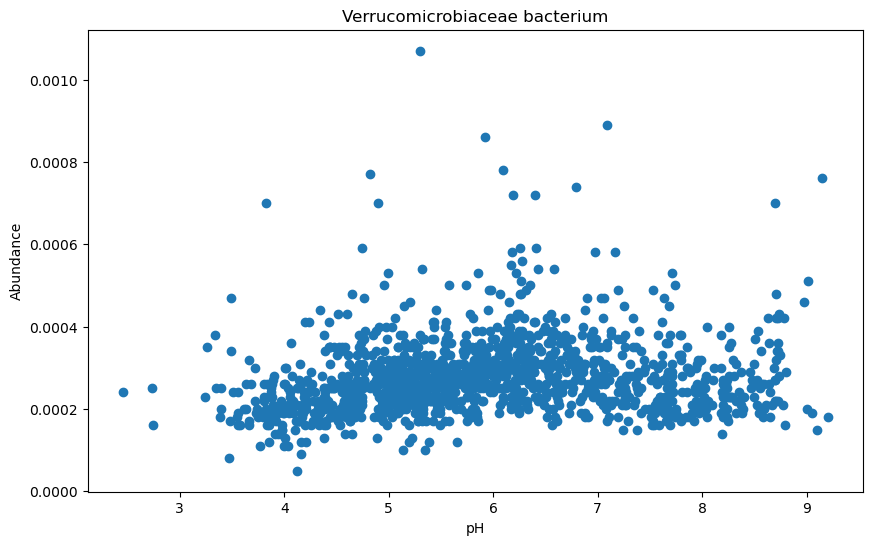

<Figure size 640x480 with 0 Axes>

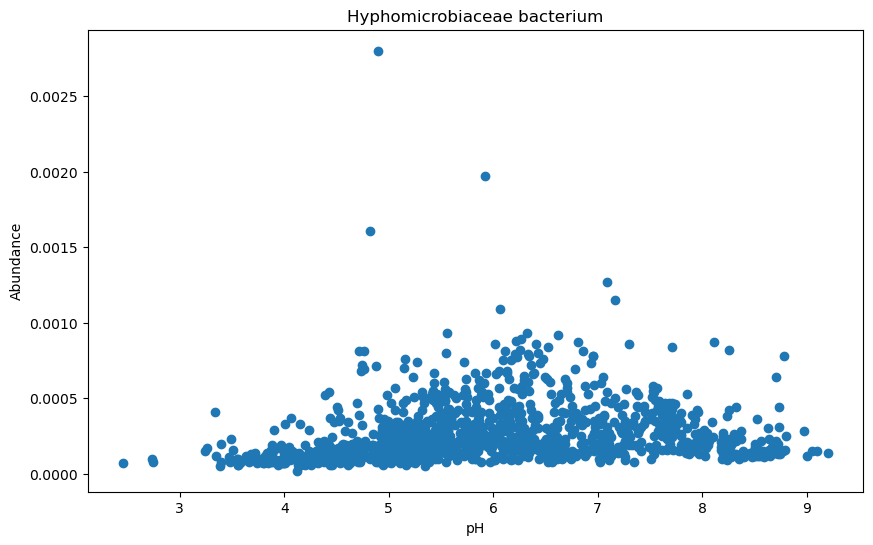

<Figure size 640x480 with 0 Axes>

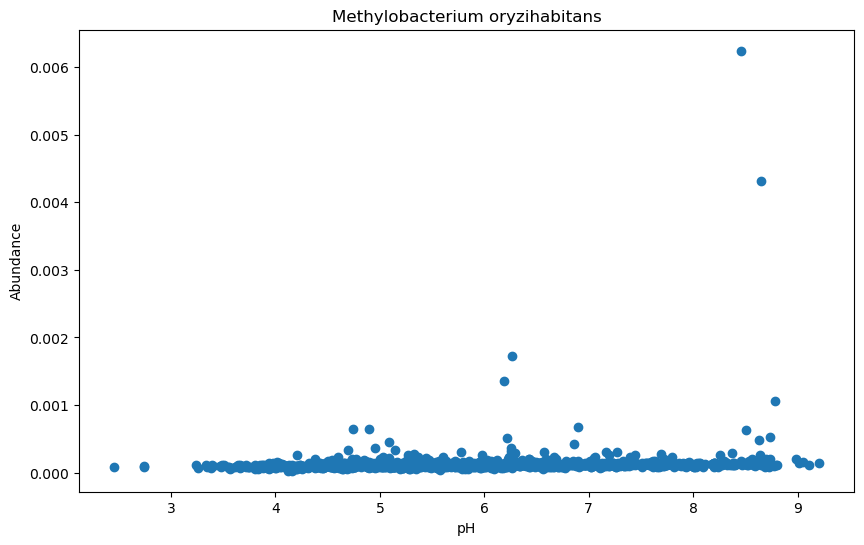

<Figure size 640x480 with 0 Axes>

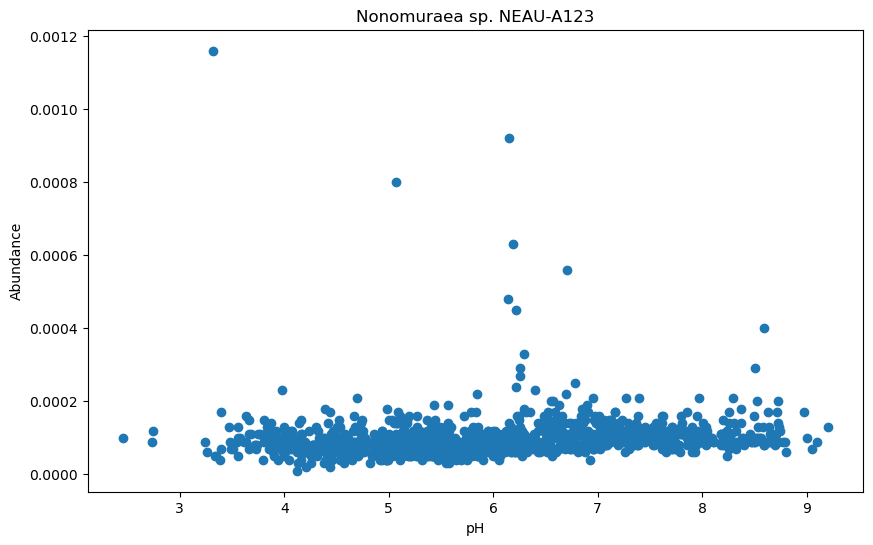

<Figure size 640x480 with 0 Axes>

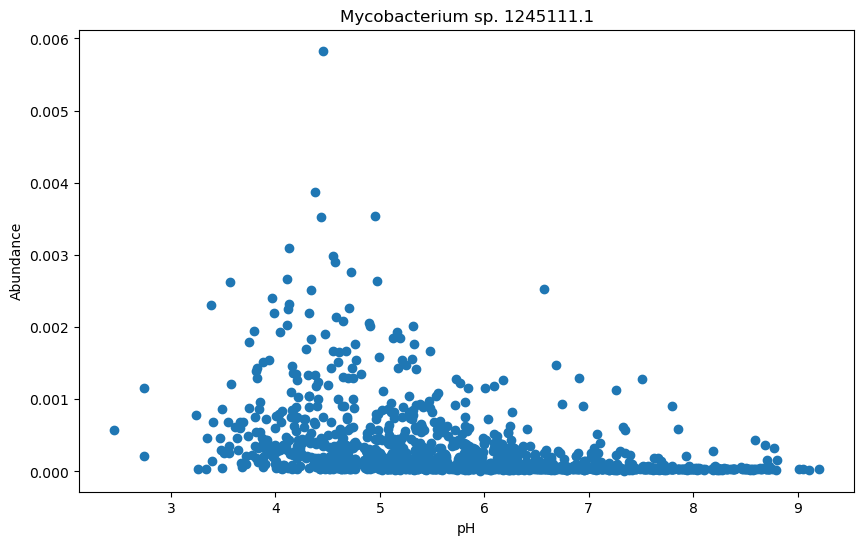

<Figure size 640x480 with 0 Axes>

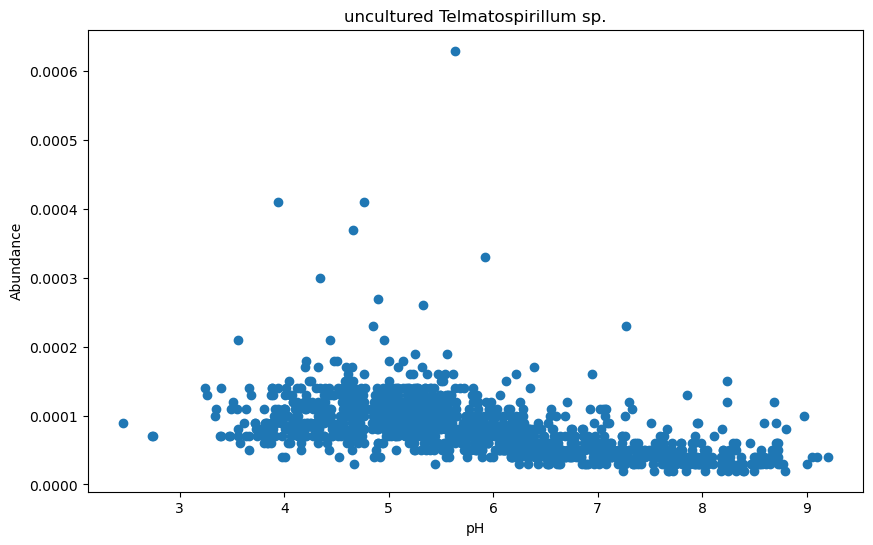

<Figure size 640x480 with 0 Axes>

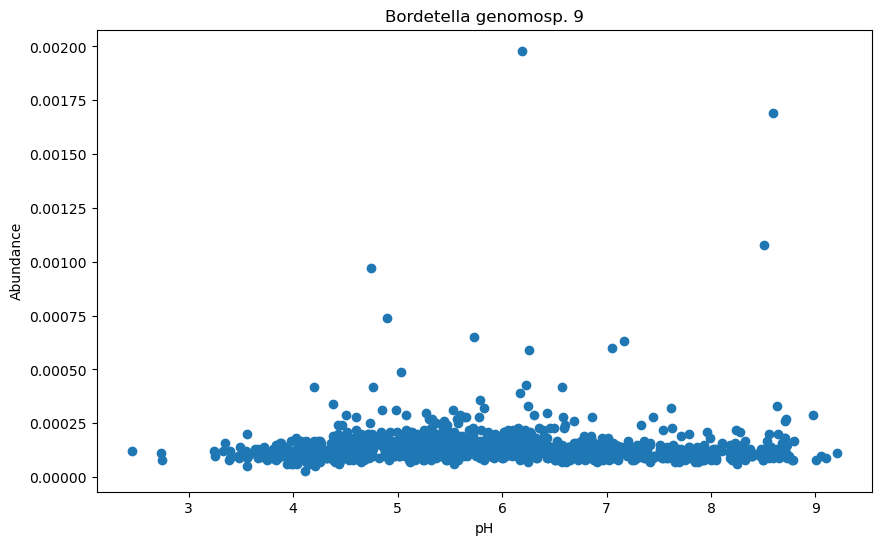

<Figure size 640x480 with 0 Axes>

In [291]:
# Plot individually for each species
for species in species_name:
    species_data = target_species[target_species['Species of interest'] == species]
    plt.figure(figsize=(10, 6))
    plt.scatter(species_data['soilInWaterpH'], species_data['percentage'])
    plt.xlabel('pH')
    plt.ylabel('Abundance')
    plt.title(species)
    plt.show()
    plt.savefig(f'abundance_vs_ph_{species}.png')

    

# Models Specific to Organisms

In [369]:
species_of_interest = species_name[2]
species_data = target_species[target_species['Species of interest'] == species_of_interest]

# Drop outliers, abundance over 0.001

species_data = species_data[species_data['percentage'] < 0.001]


# Add Features

In [ ]:
# 

In [352]:
# Add how many stds away is temp away from temp preference
temperature_std = species_data["soilTemp"].std()  # Calculate std deviation
species_data["temp stds away"] = (species_data["soilTemp"] - species_data["temperature_preference"]) / temperature_std

# Add how many stds away is soilinwaterpH away from pH preference
pH_std = species_data["soilInWaterpH"].std()  # Calculate std deviation
species_data["pH stds away"] = (species_data["soilInWaterpH"] - species_data["pH_preference"]) / pH_std

# Add how many stds away is soilincaclpH away from pH preference
pH_std = species_data["soilInCaClpH"].std()  # Calculate std deviation
species_data["pH soilInCaClpH away"] = (species_data["soilInCaClpH"] - species_data["pH_preference"]) / pH_std



In [353]:
features = [
    'temperature_preference', 'pH_preference', 'soilTemp', 'soilMoisture',
    'soilInWaterpH', 'soilInCaClpH', 'latitude', 'longitude', 'elevation', "temp stds away", "pH stds away", "pH soilInCaClpH away"
]

# features = [col for col in species_data.select_dtypes(include='number').columns if col != 'percentage']
# features = ['soilTemp', 'soilInCaClpH', "n_samples", "soilMoisture"]

categorical_features = ['nlcdClass']
target = 'percentage'  

In [354]:
# train test split
from sklearn.model_selection import train_test_split

X = species_data[features]
y = species_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Print max and min values for temperature, pH, and abundance
print("Max and Min values in X_train:")
print("Max Temperature:", X_train['soilTemp'].max())
print("Min Temperature:", X_train['soilTemp'].min())
print("Max pH:", X_train['soilInWaterpH'].max())
print("Min pH:", X_train['soilInWaterpH'].min())
print("Max Abundance:", y_train.max())
print("Min Abundance:", y_train.min())

print("\nMax and Min values in X_test:")
print("Max Temperature:", X_test['soilTemp'].max())
print("Min Temperature:", X_test['soilTemp'].min())
print("Max pH:", X_test['soilInWaterpH'].max())
print("Min pH:", X_test['soilInWaterpH'].min())
print("Max Abundance:", y_test.max())
print("Min Abundance:", y_test.min())



Max and Min values in X_train:
Max Temperature: 41.1333333333333
Min Temperature: 0.5
Max pH: 9.10404683399582
Min pH: 2.4580515826525
Max Abundance: 0.00093
Min Abundance: 2e-05

Max and Min values in X_test:
Max Temperature: 33.6666666666667
Min Temperature: 1.26666666666667
Max pH: 9.20317332579521
Min pH: 2.74496109021977
Max Abundance: 0.00092
Min Abundance: 6e-05


In [355]:
# add average temp based on training to both trianing and test 
X_train['average_temp'] = X_train['soilTemp'].mean()
X_test['average_temp'] = X_train['soilTemp'].mean()
X_train['temp_std'] = X_train['soilTemp'].std()
X_test['temp_std'] = X_train['soilTemp'].std()

# add average pH based on training to both trianing and test
X_train['average_pH'] = X_train['soilInWaterpH'].mean()
X_test['average_pH'] = X_train['soilInWaterpH'].mean()
X_train['pH_std'] = X_train['soilInWaterpH'].std()
X_test['pH_std'] = X_train['soilInWaterpH'].std()

# add avergae soilincaclph based on training to both trianing and test
X_train['average_soilInCaClpH'] = X_train['soilInCaClpH'].mean()
X_test['average_soilInCaClpH'] = X_train['soilInCaClpH'].mean()
X_train['soilInCaClpH_std'] = X_train['soilInCaClpH'].std()
X_test['soilInCaClpH_std'] = X_train['soilInCaClpH'].std()


# add average abundance based on training to both 
# trianing and test
y_train_mean = y_train.mean()
y_train_std = y_train.std()
X_train['average_abundance'] = y_train_mean
X_test['average_abundance'] = y_train_mean
X_train['abundance_std'] = y_train_std
X_test['abundance_std'] = y_train_std



In [356]:
# Check for missing values
missing_values = X_train.isnull().sum()
print(missing_values)


temperature_preference     0
pH_preference              0
soilTemp                  40
soilMoisture              64
soilInWaterpH             47
soilInCaClpH              39
latitude                   0
longitude                  0
elevation                  0
temp stds away            40
pH stds away              47
pH soilInCaClpH away      39
average_temp               0
temp_std                   0
average_pH                 0
pH_std                     0
average_soilInCaClpH       0
soilInCaClpH_std           0
average_abundance          0
abundance_std              0
dtype: int64


In [357]:
# Fill each missing value with the median of the corresponding column
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_train.median())



In [358]:
features = X_train.columns

Standardizing features...
Starting Grid Search for XGBoost...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s


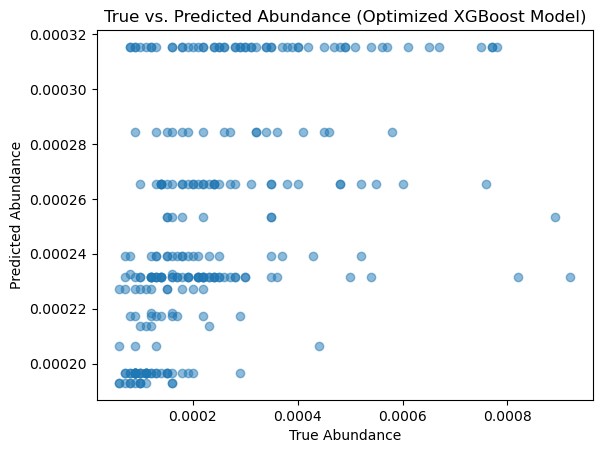

                   feature  importance
11    pH soilInCaClpH away    0.250545
5             soilInCaClpH    0.231826
7                longitude    0.179004
8                elevation    0.175376
4            soilInWaterpH    0.163249
0   temperature_preference    0.000000
13                temp_std    0.000000
18       average_abundance    0.000000
17        soilInCaClpH_std    0.000000
16    average_soilInCaClpH    0.000000
15                  pH_std    0.000000
14              average_pH    0.000000
10            pH stds away    0.000000
12            average_temp    0.000000
1            pH_preference    0.000000
9           temp stds away    0.000000
6                 latitude    0.000000
3             soilMoisture    0.000000
2                 soilTemp    0.000000
19           abundance_std    0.000000


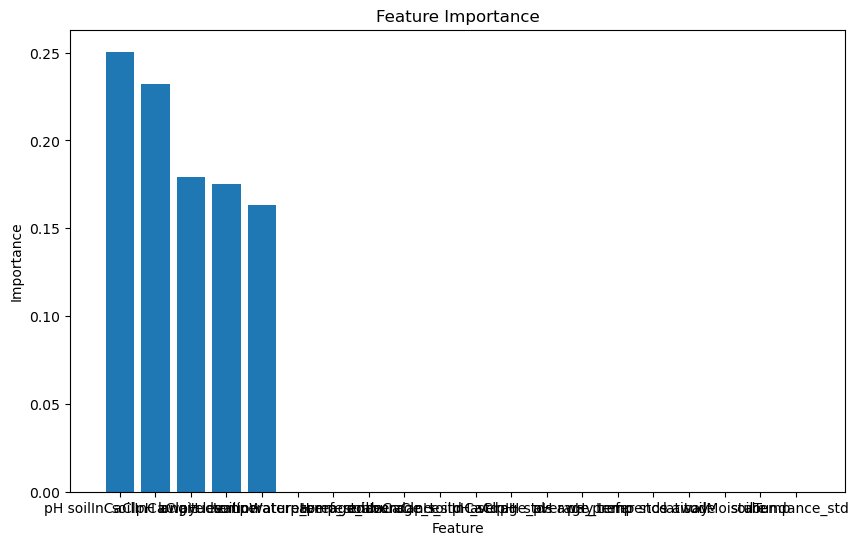

In [326]:
# Train an XGBoost model
from xgboost import XGBRegressor  
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Standardize features
print("Standardizing features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Set up the parameter grid for optimization
param_grid = {
    'n_estimators': [100, 200, 300],          # Number of trees
    'max_depth': [3, 5, 7],                  # Maximum tree depth
    'learning_rate': [0.01, 0.1, 0.2],       # Learning rate
    'subsample': [0.8, 1.0],                 # Subsample ratio
    'colsample_bytree': [0.8, 1.0],          # Fraction of features to be randomly sampled for each tree
    'gamma': [0, 1]                          # Minimum loss reduction to make a split
}


# Set up the GridSearchCV
print("Starting Grid Search for XGBoost...")
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='r2',  # Use R² score for evaluation
    n_jobs=-1,     # Use all available cores
    verbose=2      # Verbosity mode
)

# Perform the grid search
grid_search.fit(X_train_scaled, y_train)

# Retrieve the best model and parameters
best_xgb_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_r2_cv = grid_search.best_score_

print("\nBest Hyperparameters for XGBoost:", best_params)
print(f"Best R² Score from Cross-Validation: {best_r2_cv:.2f}")

# Evaluate the optimized model on the test set
print("Evaluating the optimized XGBoost model on the test set...")
y_pred_optimized = best_xgb_model.predict(X_test_scaled)
optimized_r2 = r2_score(y_test, y_pred_optimized)
optimized_mse = mean_squared_error(y_test, y_pred_optimized)

print(f"Test R²: {optimized_r2:.2f}")
print(f"Mean Squared Error: {optimized_mse:.2f}")

# Visualize predictions vs. true values
print("Visualizing predictions vs. true values...")
plt.scatter(y_test, y_pred_optimized, alpha=0.5)
plt.xlabel("True Abundance")
plt.ylabel("Predicted Abundance")
plt.title("True vs. Predicted Abundance (Optimized XGBoost Model)")
plt.show()



# Feature importance
importances = best_xgb_model.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)
print(feature_importances)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


Default XGBoost Model - Test R²: 0.19
Default XGBoost Model - Mean Squared Error: 0.00
                   feature  importance
5             soilInCaClpH    0.291561
7                longitude    0.280474
6                 latitude    0.230175
4            soilInWaterpH    0.197789
0   temperature_preference    0.000000
12            average_temp    0.000000
18       average_abundance    0.000000
17        soilInCaClpH_std    0.000000
16    average_soilInCaClpH    0.000000
15                  pH_std    0.000000
14              average_pH    0.000000
13                temp_std    0.000000
10            pH stds away    0.000000
11    pH soilInCaClpH away    0.000000
1            pH_preference    0.000000
9           temp stds away    0.000000
8                elevation    0.000000
3             soilMoisture    0.000000
2                 soilTemp    0.000000
19           abundance_std    0.000000


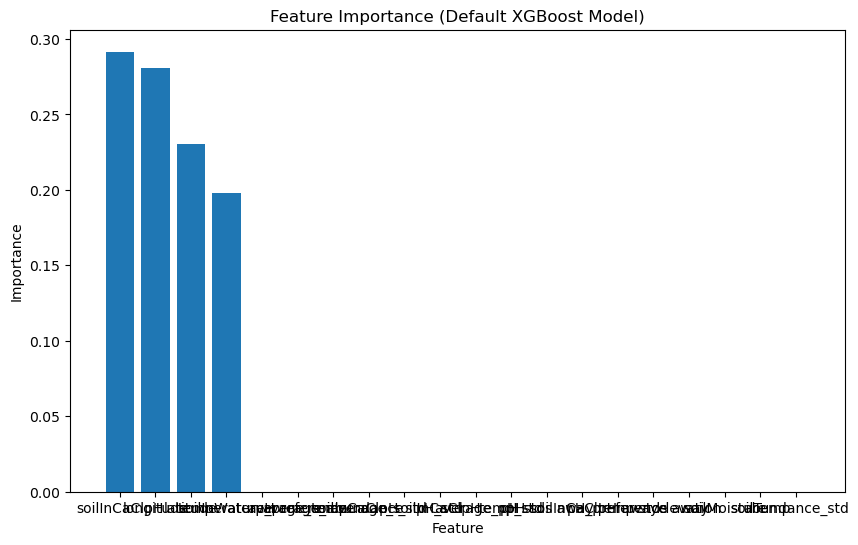

In [327]:
# XGBoost model with default hyperparameters

# Define the XGBoost model
xgb_model_default = XGBRegressor(random_state=42)

# Predict on the test set
xgb_model_default.fit(X_train_scaled, y_train)
y_pred_default = xgb_model_default.predict(X_test_scaled)

# Evaluate the default model
default_r2 = r2_score(y_test, y_pred_default)
default_mse = mean_squared_error(y_test, y_pred_default)

print(f"Default XGBoost Model - Test R²: {default_r2:.2f}")
print(f"Default XGBoost Model - Mean Squared Error: {default_mse:.2f}")

# Importance of features in the default model
importances_default = xgb_model_default.feature_importances_
feature_importances_default = pd.DataFrame({'feature': features, 'importance': importances_default})
feature_importances_default = feature_importances_default.sort_values('importance', ascending=False)
print(feature_importances_default)

# Plot the feature importances for the default model
plt.figure(figsize=(10, 6))
plt.bar(feature_importances_default['feature'], feature_importances_default['importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance (Default XGBoost Model)')
plt.show()


In [328]:
# Gaussian Process Regression

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Define the Gaussian Process model
kernel = 1.0 * RBF(length_scale=1.0) + WhiteKernel(noise_level=1)
gpr_model = make_pipeline(StandardScaler(), GaussianProcessRegressor(kernel=kernel, random_state=42))

# Fit the model
gpr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gpr = gpr_model.predict(X_test)

# Evaluate the model
gpr_r2 = r2_score(y_test, y_pred_gpr)
gpr_mse = mean_squared_error(y_test, y_pred_gpr)

print(f"Gaussian Process Regression - Test R²: {gpr_r2:.2f}")
print(f"Gaussian Process Regression - Mean Squared Error: {gpr_mse:.2f}")


Gaussian Process Regression - Test R²: -0.01
Gaussian Process Regression - Mean Squared Error: 0.00


/Users/nikhilramchandani/anaconda3/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/nikhilramchandani/anaconda3/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/nikhilramchandani/anaconda3/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


In [329]:
# Simeple Linear Regression
from sklearn.linear_model import LinearRegression

# Define the Linear Regression model
lin_reg_model = LinearRegression()

# Fit the model
lin_reg_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lin_reg = lin_reg_model.predict(X_test)

# Evaluate the model
lin_reg_r2 = r2_score(y_test, y_pred_lin_reg)
lin_reg_mse = mean_squared_error(y_test, y_pred_lin_reg)

print(f"Linear Regression - Test R²: {lin_reg_r2:.2f}")
print(f"Linear Regression - Mean Squared Error: {lin_reg_mse:.2f}")



Linear Regression - Test R²: 0.16
Linear Regression - Mean Squared Error: 0.00


In [330]:
# Beta Regression
from sklearn.linear_model import TweedieRegressor

# Define the Tweedie Regression model
tweedie_model = TweedieRegressor(power=1, alpha=0.5)

# Fit the model
tweedie_model.fit(X_train, y_train)

# Predict on the test set
y_pred_tweedie = tweedie_model.predict(X_test)

# Evaluate the model

tweedie_r2 = r2_score(y_test, y_pred_tweedie)

tweedie_mse = mean_squared_error(y_test, y_pred_tweedie)

print(f"Tweedie Regression - Test R²: {tweedie_r2:.2f}")
print(f"Tweedie Regression - Mean Squared Error: {tweedie_mse:.2f}")




Tweedie Regression - Test R²: 0.01
Tweedie Regression - Mean Squared Error: 0.00


In [364]:
features = ['temperature_preference', 'pH_preference', 'soilTemp', 'soilMoisture',
    'soilInWaterpH', 'soilInCaClpH', 'latitude', 'longitude', 'elevation']

In [365]:
X = species_data[features]
y = species_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [366]:
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_train.median())

In [367]:
print(X_train.shape)
print(X_test.shape)
# print max percentage in X_train
print(y_train.max())

(1071, 9)
(268, 9)
0.00093


In [368]:
# Add these imports at the beginning of your file
from tensorflow import keras
from keras import layers
from keras import backend as K
import tensorflow as tf  # Import TensorFlow
from sklearn.preprocessing import StandardScaler
from keras import layers, regularizers


# After merging the data and preparing your features and target
# Define the neural network model
model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),  # Input layer
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  # Hidden layer with L2 regularization
    layers.Dropout(0.2),  # Dropout layer to prevent overfitting
    layers.Dense(64, activation='relu'),  # Hidden layer
    layers.Dense(1)  # Output layer
])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Compile the model


model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=200, batch_size=16, validation_split=0.2)

# Make predictions
y_pred_nn = model.predict(X_test_scaled)

# Evaluate the model
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"Neural Network Mean Squared Error: {mse_nn:.4f}")
print(f"Neural Network R^2 Score: {r2_nn:.4f}")

Epoch 1/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1748 - mae: 0.1113 - val_loss: 0.1100 - val_mae: 0.0370
Epoch 2/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - loss: 0.1035 - mae: 0.0529 - val_loss: 0.0684 - val_mae: 0.0290
Epoch 3/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - loss: 0.0624 - mae: 0.0334 - val_loss: 0.0418 - val_mae: 0.0178
Epoch 4/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0385 - mae: 0.0260 - val_loss: 0.0254 - val_mae: 0.0071
Epoch 5/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - loss: 0.0231 - mae: 0.0151 - val_loss: 0.0158 - val_mae: 0.0081
Epoch 6/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - loss: 0.0145 - mae: 0.0114 - val_loss: 0.0099 - val_mae: 0.0045
Epoch 7/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - loss: 0.0093 - mae: 0.0101 - val_loss: 0.0066 - val_mae: 0.0072
Epoch 8/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - loss: 0.0061 - mae: 0.0075 - val_loss: 0.0043 - val_mae: 0.0033
Epoch 9/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step

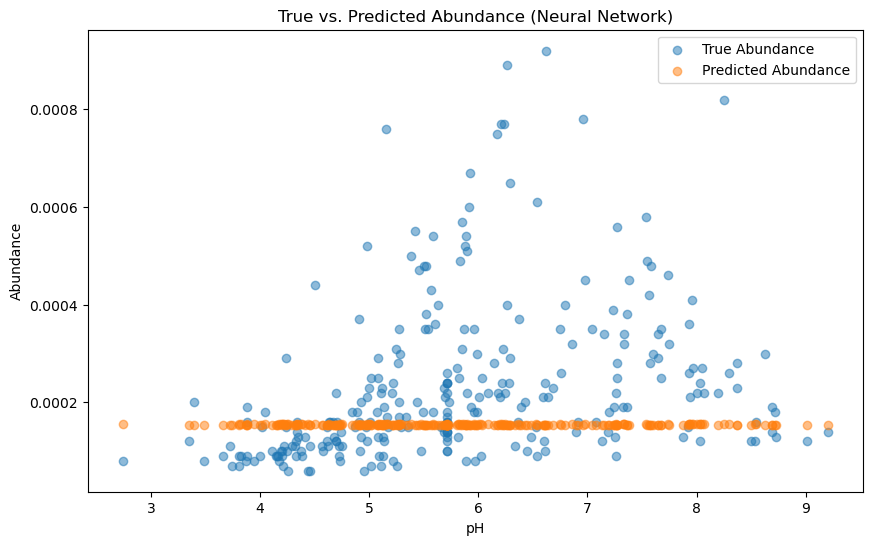

In [347]:
# plot out predicted abundance vs pH
plt.figure(figsize=(10, 6))
plt.scatter(X_test['soilInWaterpH'], y_test, label='True Abundance', alpha=0.5)
plt.scatter(X_test['soilInWaterpH'], y_pred_nn, label='Predicted Abundance', alpha=0.5)
plt.xlabel('pH')
plt.ylabel('Abundance')
plt.title('True vs. Predicted Abundance (Neural Network)')
plt.legend()
plt.show()


In [350]:
# Neural network using all organisms data

features = ['temperature_preference', 'pH_preference', 'soilTemp', 'soilMoisture',
    'soilInWaterpH', 'soilInCaClpH', 'latitude', 'longitude', 'elevation', 'n_samples']

#drop all percentage above 0.001
subset_data = merged_data[merged_data['percentage'] < 0.001]


X = subset_data[features]
y = subset_data[target]

# Drop all percentage above 0.001

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_train.median())  # Ensure to fill missing values in the test set as well

# Define the neural network model
model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),  # Input layer
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  # Increased neurons
    layers.Dropout(0.3),  # Increased dropout rate
    layers.Dense(128, activation='relu'),  # Hidden layer
    layers.BatchNormalization(),  # Added batch normalization
    layers.Dense(64, activation='relu'),  # Hidden layer
    layers.Dense(1)  # Output layer
])

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005), loss='mean_squared_error', metrics=['mae'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=300, batch_size=16, validation_split=0.2)

# Make predictions
y_pred_nn = model.predict(X_test_scaled)

# Evaluate the model
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"Neural Network Mean Squared Error: {mse_nn:.4f}")
print(f"Neural Network R^2 Score: {r2_nn:.4f}")

Epoch 1/300


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_54" is incompatible with the layer: expected axis -1 of input shape to have value 9, but received input with shape (None, 10)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 10), dtype=float32)
  • training=True
  • mask=None

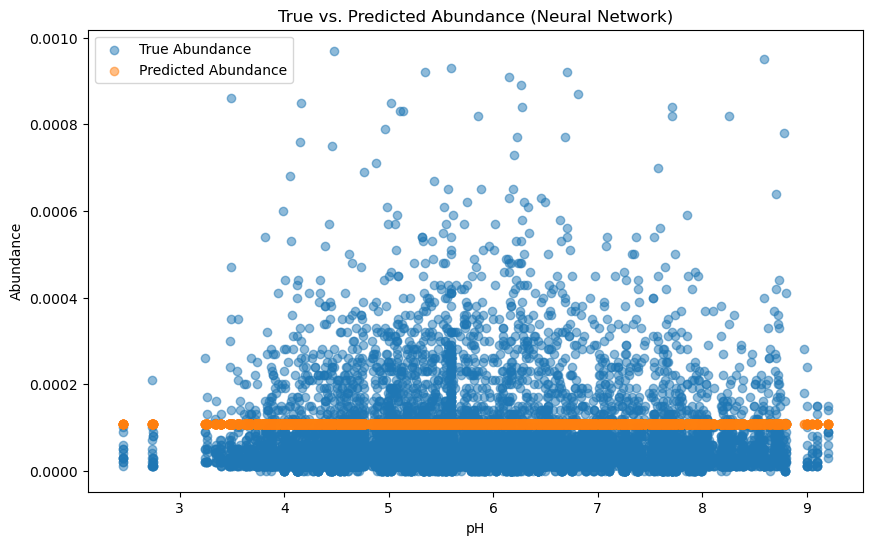

In [349]:
# plot out predicted abundance vs pH
plt.figure(figsize=(10, 6))
plt.scatter(X_test['soilInWaterpH'], y_test, label='True Abundance', alpha=0.5)
plt.scatter(X_test['soilInWaterpH'], y_pred_nn, label='Predicted Abundance', alpha=0.5)
plt.xlabel('pH')
plt.ylabel('Abundance')
plt.title('True vs. Predicted Abundance (Neural Network)')
plt.legend()
plt.show()



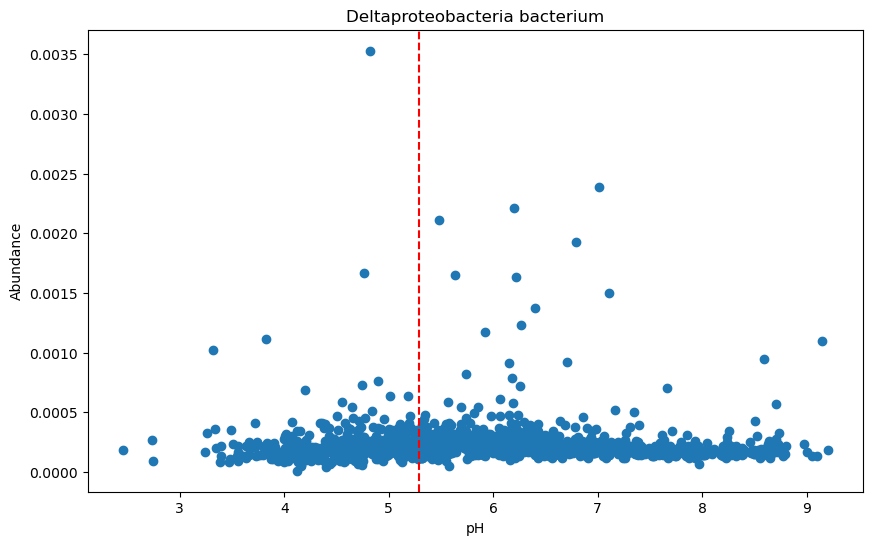

<Figure size 640x480 with 0 Axes>

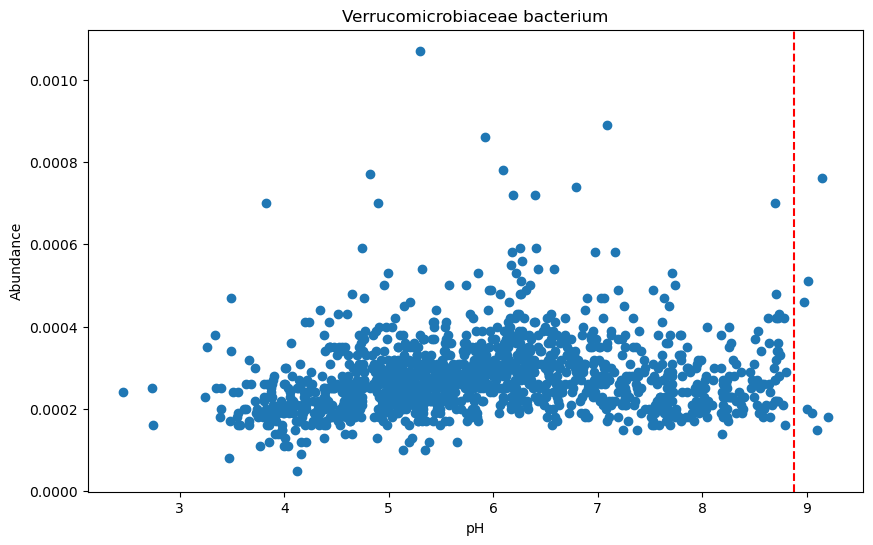

<Figure size 640x480 with 0 Axes>

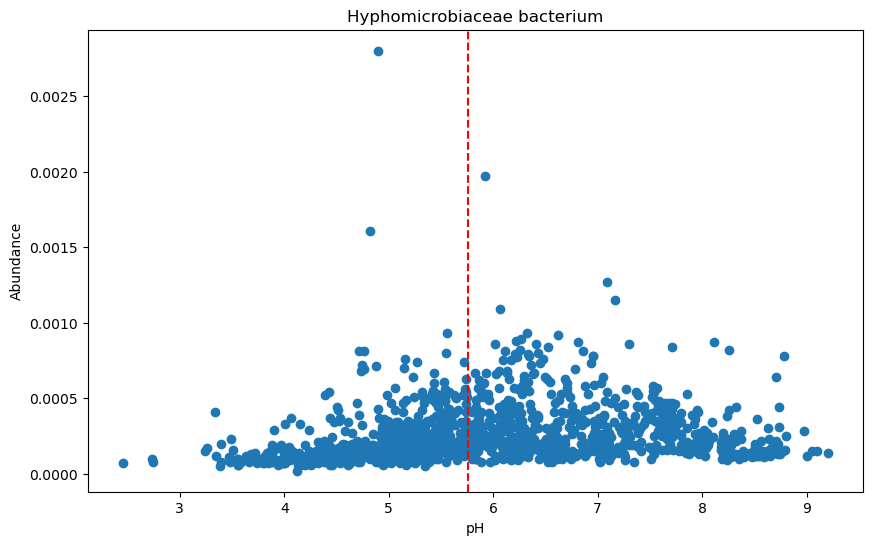

<Figure size 640x480 with 0 Axes>

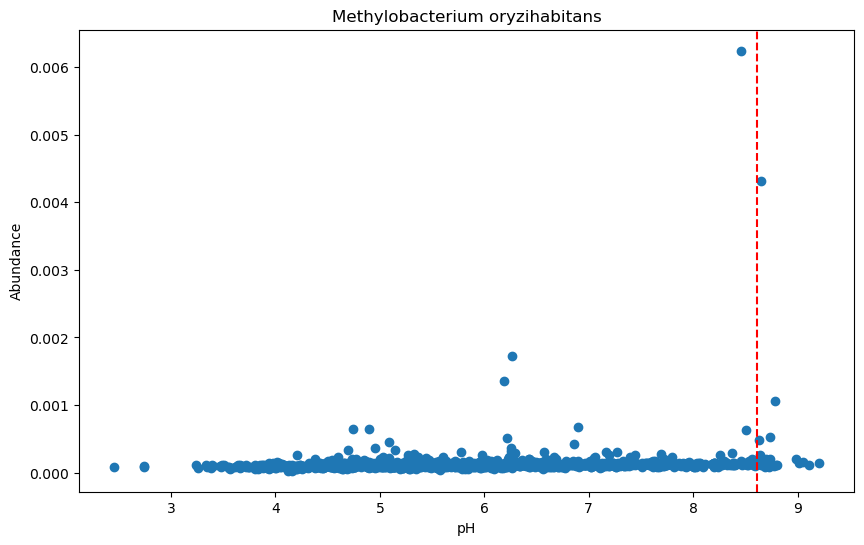

<Figure size 640x480 with 0 Axes>

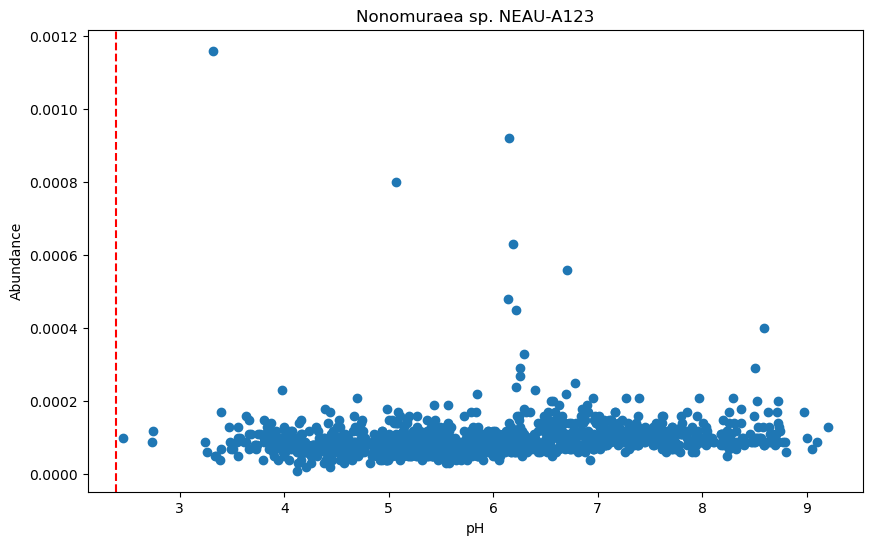

<Figure size 640x480 with 0 Axes>

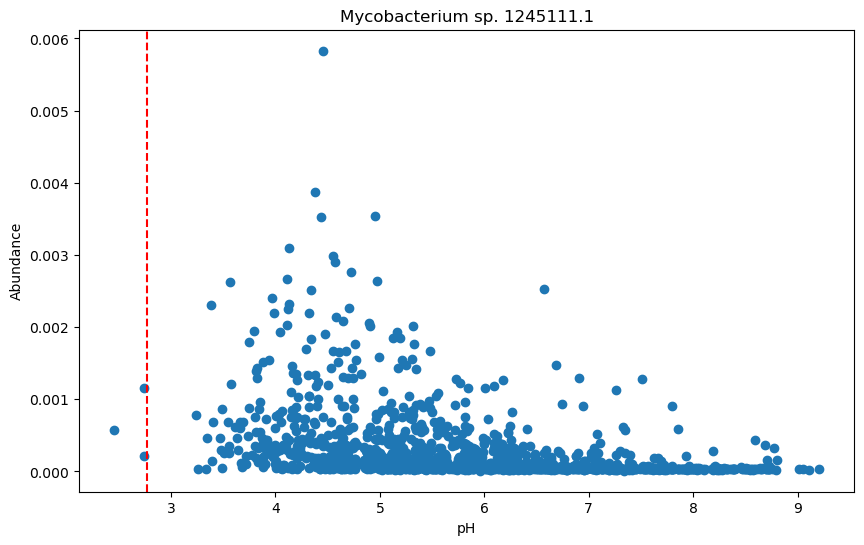

<Figure size 640x480 with 0 Axes>

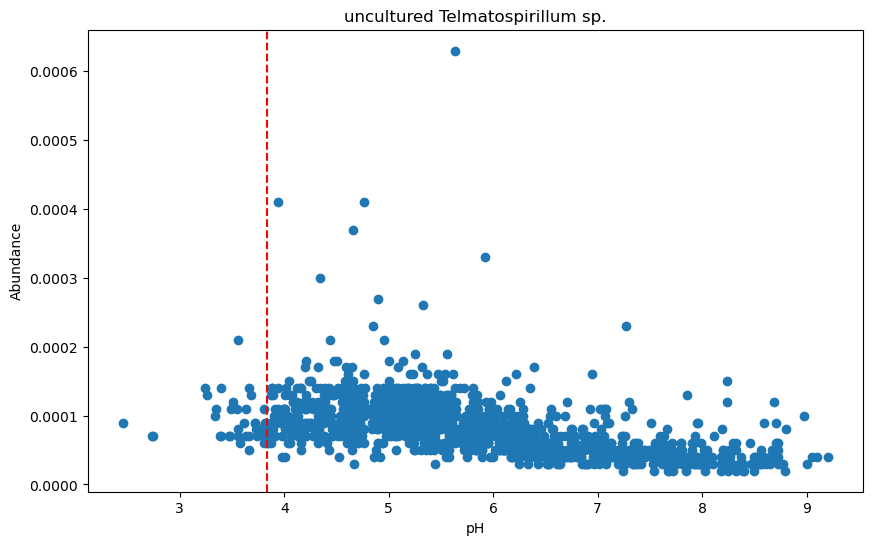

<Figure size 640x480 with 0 Axes>

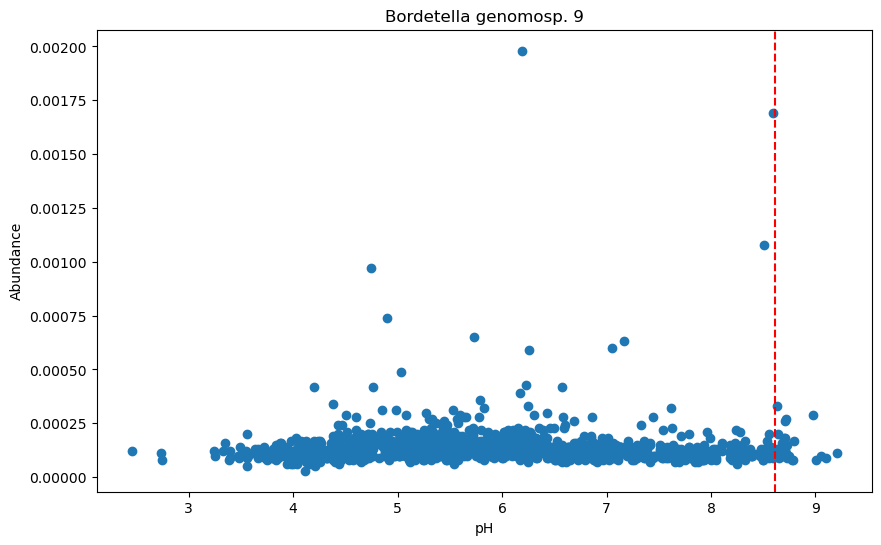

<Figure size 640x480 with 0 Axes>

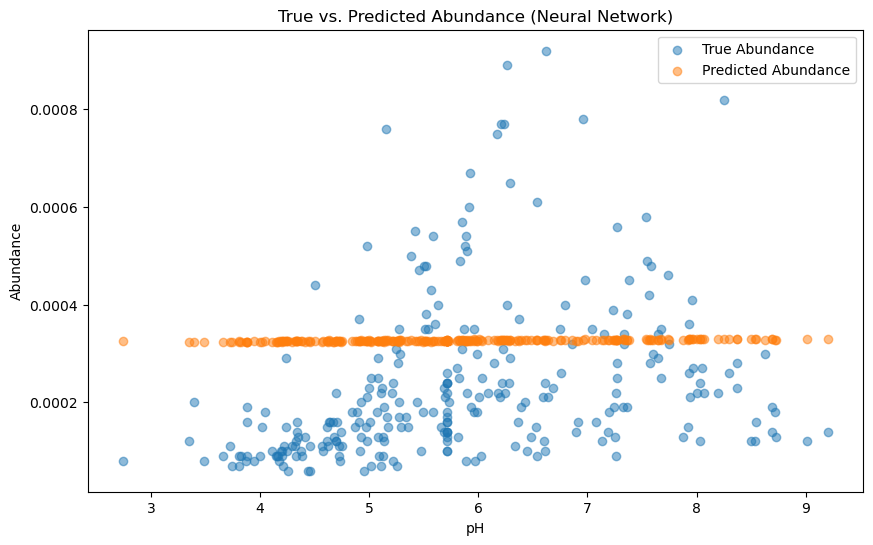

In [374]:


# Plot individually for each species
for species in species_name:
    species_data = target_species[target_species['Species of interest'] == species]
    plt.figure(figsize=(10, 6))
    plt.scatter(species_data['soilInWaterpH'], species_data['percentage'])
    plt.xlabel('pH')
    plt.ylabel('Abundance')
    # plt.ylim(0, 0.001)  # Set y-axis limits
    plt.title(species)
    plt.axvline(x=species_data['pH_preference'].iloc[0], color='r', linestyle='--', label='pH Preference')  # Add pH preference line
    plt.legend
    plt.show()
    plt.savefig(f'abundance_vs_ph_{species}.png')

# Plot out predicted abundance vs pH
plt.figure(figsize=(10, 6))
plt.scatter(X_test['soilInWaterpH'], y_test, label='True Abundance', alpha=0.5)
plt.scatter(X_test['soilInWaterpH'], y_pred_nn, label='Predicted Abundance', alpha=0.5)
plt.xlabel('pH')
plt.ylabel('Abundance')
# plt.ylim(0, 0.001)  # Set y-axis limits
plt.title('True vs. Predicted Abundance (Neural Network)')
plt.legend()
plt.show()